### Diagnosa Penyakit Kanker Payudara Menggunakan Jaringan Saraf Tiruan

#### NAMA : Ahmad Naufal Irfan
#### NIM : 09011381722102

Kanker payudara adalah salah satu bentuk yang paling sering kanker di kalangan perempuan diseluruh dunia.
Kanker payudara merupakan kondisi ketika sel kanker terbentuk di jaringan payudara. Kanker bisa terbentuk di kelenjar yang menghasilkan susu (lobulus), atau di saluran (duktus) yang membawa air susu dari kelenjar ke puting payudara. Kanker juga bisa terbentuk di jaringan lemak atau jaringan ikat di dalam payudara.

# Mengimport Library yang diperlukan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
np.random.seed(7)

Using TensorFlow backend.


Berikut adalah Daftar Modul yang digunakan :

   #### Numpy
   untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks.

   #### Matplotlib
   untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix, grafik akurasi, dll.

   #### Keras
   digunakan untuk membuat, menambah, dan mengevaluasi model neural network.

   #### Sklearn 
   ini adalah salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti preprocessing, dan lainnya.

## Dataset

### informasi dataset

Dataset dapat didownload pada

https://www.kaggle.com/zzero0/uci-breast-cancer-wisconsin-original

### Import Dataset

In [2]:
df = np.loadtxt("KankerPayudara.csv", delimiter=",")

Kode di atas digunakan untuk load dataset dengan nama "KankerPayudara.csv"

In [3]:
X = df[:,0:9]
Y = df[:,9]
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

X adalah Nilai Input.


In [4]:
Y

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1.

Y adalah Output

Nilai Outputnya adalah 0 dan 1.

In [5]:
scaler = MinMaxScaler()
KankerPayudara = scaler.fit_transform(X)

## Categorical

In [6]:
from keras.utils.np_utils import to_categorical
Y_categorical = to_categorical(Y)
Y_categorical.shape

(683, 2)

## Model

In [7]:
# Membuat variabel yang digunakan sebagai penampung fungsi Sequential()
model = Sequential()

# Menambahkan layer input kedalam model
model.add(Dense(50, input_dim=9, activation='relu'))
model.add(Dense(40, activation='relu'))

# menambahkan layer output kedalam model
model.add(Dense(2, activation='softmax'))

- Dense 50 = Neural Network pada layer pertama terdiri dari 50 neuron.

- Dense 40 = Neural Network pada layer pertama ini terdiri dari 40 neuron.

- Dense 2 = Neural Network yang saya buat pada layer terakhir ini terdiri dari 2 neuron, neuron inilah yang akan menghasilkan output berdasarkan dataset yang ada dan memprediksi apakah terdapat penipuan kartu kredit atau tidak.

- Input dim 9 = Berdasarkan dataset yang dipakai, terdiri dari 10 kategori. 9 kategori input, dan 1 kategori output.

- Relu = Merupakan fungsi aktivasi yang digunakan pada layer ini.

- Softmax = Merupakan fungsi lapisan jaringan saraf yang digunakan pada layer ini. Probabilitas yang dihitung akan berada dikisaran 0 dan 1, jumlah semua probabilitas akan sama dengan 1.

## Compile Model

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'] )

Fungsi kompilasi pada model

- Loss = Pengidentifikasi string dari fungsi kerugian yang ada (seperti kategorikal_crossentropy), atau dapat menjadi fungsi obyektif. Tujuan yang akan coba diminimalkan oleh model.

- Optimizer = Pengenal string dari pengoptimal yang ada (seperti adam), atau turunan dari kelas Pengoptimal. 

- Metrics = Untuk masalah klasifikasi apa pun, mengaturnya ke metrik = ['akurasi']. Metrik bisa menjadi pengidentifikasi string dari metrik yang ada atau fungsi metrik khusus.

In [9]:
history=model.fit(KankerPayudara, Y_categorical, validation_split=0.5, epochs=100, batch_size=12)


Train on 341 samples, validate on 342 samples
Epoch 1/100
341/341 [==============================] - 2s 7ms/step - loss: 0.5793 - accuracy: 0.8123 - val_loss: 0.5692 - val_accuracy: 0.7924
Epoch 2/100
341/341 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.9326 - val_loss: 0.3706 - val_accuracy: 0.9649
Epoch 3/100
341/341 [==============================] - 1s 2ms/step - loss: 0.2521 - accuracy: 0.9589 - val_loss: 0.1942 - val_accuracy: 0.9766
Epoch 4/100
341/341 [==============================] - 1s 2ms/step - loss: 0.1719 - accuracy: 0.9589 - val_loss: 0.1221 - val_accuracy: 0.9795
Epoch 5/100
341/341 [==============================] - 1s 2ms/step - loss: 0.1386 - accuracy: 0.9560 - val_loss: 0.0872 - val_accuracy: 0.9795
Epoch 6/100
341/341 [==============================] - 1s 4ms/step - loss: 0.1276 - accuracy: 0.9560 - val_loss: 0.0743 - val_accuracy: 0.9766
Epoch 7/100
341/341 [==============================] - 1s 2ms/step - loss: 0.1187 - accuracy: 0

341/341 [==============================] - 1s 2ms/step - loss: 0.0542 - accuracy: 0.9824 - val_loss: 0.0513 - val_accuracy: 0.9795
Epoch 56/100
341/341 [==============================] - 1s 4ms/step - loss: 0.0529 - accuracy: 0.9795 - val_loss: 0.0519 - val_accuracy: 0.9795
Epoch 57/100
341/341 [==============================] - 2s 7ms/step - loss: 0.0539 - accuracy: 0.9765 - val_loss: 0.0524 - val_accuracy: 0.9825
Epoch 58/100
341/341 [==============================] - 1s 4ms/step - loss: 0.0524 - accuracy: 0.9795 - val_loss: 0.0533 - val_accuracy: 0.9795
Epoch 59/100
341/341 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9795 - val_loss: 0.0517 - val_accuracy: 0.9795
Epoch 60/100
341/341 [==============================] - 0s 824us/step - loss: 0.0537 - accuracy: 0.9765 - val_loss: 0.0529 - val_accuracy: 0.9795
Epoch 61/100
341/341 [==============================] - 0s 733us/step - loss: 0.0506 - accuracy: 0.9824 - val_loss: 0.0561 - val_accuracy: 0.9854
E

Objek histori dikembalikan dari panggilan ke fungsi fit () yang digunakan untuk train model.

#### Epoch 
ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation). 

#### Batch Size 
jumlah sampel data yang disebarkan ke Neural Network. Pada format diatas menggunakan angka 12, jadi dataset akan dibagi menjadi 12 bagian untuk memudahkan index pada saat pelatihan. 

#### Validation Split
Adalah ukuran data yang akan digunakan untuk testing dan training, data training sebesar 0,5 atau 50%, dan data testing sebesar 0,5 atau 50%.

## Prediksi Model

In [10]:
predict = model.predict(KankerPayudara)
predict

array([[9.9999881e-01, 1.2338505e-06],
       [6.2552160e-01, 3.7447840e-01],
       [9.9999988e-01, 1.6565484e-07],
       ...,
       [5.7595922e-04, 9.9942410e-01],
       [1.0743002e-01, 8.9256996e-01],
       [2.8273379e-04, 9.9971730e-01]], dtype=float32)

Parameter pertama menjadi array numpy, menyediakan daftar yang tidak memiliki atribut bentuk yang memiliki array numpy.

## Evaliasi Model

In [11]:
scores = model.evaluate(KankerPayudara, Y_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

683/683 [==============================] - 1s 1ms/step

accuracy: 98.68%


## Performance

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_categorical.argmax(axis=1),predict.argmax(axis=1))

## Confusion Matrix

In [13]:
cm

array([[436,   8],
       [  1, 238]], dtype=int64)

Confusion matrix adalah Untuk melakukan perhitungan akurasi pada konsep data mining.
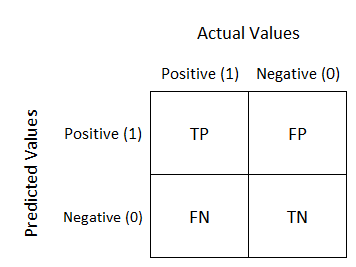

In [14]:
ac = ((436+238)/(436+238+8+1))
print("\n%s: %.2f%%" % ("Akurasi ", ac*100))


Akurasi : 98.68%


Rumus untuk mencari akurasi berdasarkan Confusion Matrix :
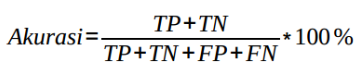

In [15]:
prec = ((436)/(8+436))
print("\n%s: %.2f%%" %("Presisi", prec*100))


Presisi: 98.20%


Rumus untuk mencari presisi berdasarkan Confusion Matrix :
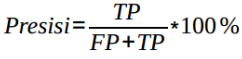

In [16]:
rec = ((436)/(1+436))
print("\n%s: %.2f%%" %("Recall", rec*100))


Recall: 99.77%


Rumus untuk mencari recall berdasarkan Confusion Matrix :
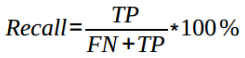

In [17]:
TNR = ((8)/(436+8))
print("\n%s: %.2f%%" %("Skor True Negative Rate", TNR))


Skor True Negative Rate: 0.02%


In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Model Accuracy

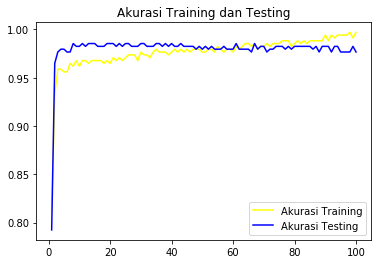

In [19]:
plt.plot(epochs, acc, 'b',color='yellow', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b',color='blue', label='Akurasi Testing')
plt.title('Akurasi Training dan Testing')
plt.legend()
plt.show()

# Model Loss

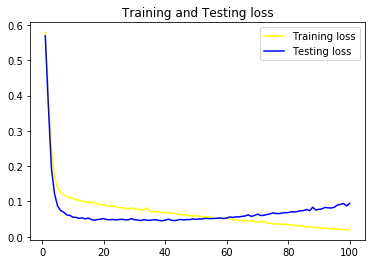

In [20]:
plt.plot(epochs, loss, 'b',color='yellow', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='blue', label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()
plt.show()